# Movie Analytics

#### Dataset: https://grouplens.org/datasets/movielens/1m/
#### Download, unzip dan masuk ke foder, lalu jalankan Jupyter dari folder tersebut

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np

## 2. Reading and Exploring Data

### Movies 

In [6]:
# movies name
mnames = ['movieid', 'title', 'genres']
movies_data = pd.read_table('movies.dat', sep='::', header=None, names=mnames, engine='python', encoding='latin-1')
print('movie shape: ',movies_data.shape)
movies_data.info()

movie shape:  (3883, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieid  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [11]:
# display
movies_data.head()

,movieid,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
# check unique movies
unique_movies = movies_data['movieid'].unique().tolist()
len(unique_movies)

3883

### Ratings

In [13]:
rnames = ['userid','movieid','rating','timestamp']
ratings_data = pd.read_table('ratings.dat', sep='::', header=None, names=rnames, engine='python', encoding='latin-1')
print('movie shape: ',ratings_data.shape)
ratings_data.info()

movie shape:  (1000209, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   userid     1000209 non-null  int64
 1   movieid    1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [14]:
# display
ratings_data

,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [15]:
ratings_data.shape

(1000209, 4)

In [16]:
# statistics summary 
ratings_data.describe()

,userid,movieid,rating,timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [17]:
# minimum rating
ratings_data['rating'].min()

1

In [18]:
# maximum rating
ratings_data['rating'].max()

5

## 3. Data Cleaning

In [19]:
movies_data.isnull().any()

movieid    False
title      False
genres     False
dtype: bool

In [20]:
ratings_data.isnull().any()

userid       False
movieid      False
rating       False
timestamp    False
dtype: bool

## 4. Data Analytics

In [25]:
# filter movies with drama genre
drama_movies = movies_data['genres'].str.contains('Drama')
print(drama_movies.shape)
drama_movies.info()

(3883,)
<class 'pandas.core.series.Series'>
RangeIndex: 3883 entries, 0 to 3882
Series name: genres
Non-Null Count  Dtype
--------------  -----
3883 non-null   bool 
dtypes: bool(1)
memory usage: 3.9 KB


In [26]:
movies_data[drama_movies]

,movieid,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama
10,11,"American President, The (1995)",Comedy|Drama|Romance
13,14,Nixon (1995),Drama
15,16,Casino (1995),Drama|Thriller
16,17,Sense and Sensibility (1995),Drama|Romance
...,...,...,...
3876,3946,Get Carter (2000),Action|Drama|Thriller
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [28]:
# merge movies dan rating
# check movies
movies_data.head()

,movieid,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [29]:
# check ratings
ratings_data.head()

,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [31]:
# merging movies dan rating dataframe
movie_ratings_data = movies_data.merge(ratings_data, on='movieid', how='inner')
movie_ratings_data

,movieid,title,genres,userid,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,1,979852537


In [34]:
# most rated/watched movies (>< highly rated movies)
# film yg paling banyak di-rating oleh users
most_rated = movie_ratings_data.groupby('title').size().sort_values(ascending=False)
most_rated.head(25)

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [37]:
most_rated = movie_ratings_data.title.value_counts(ascending=True)
most_rated

Open Season (1996)                                          1
Number Seventeen (1932)                                     1
Song of Freedom (1936)                                      1
Elstree Calling (1930)                                      1
Juno and Paycock (1930)                                     1
                                                         ... 
Jurassic Park (1993)                                     2672
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode IV - A New Hope (1977)                2991
American Beauty (1999)                                   3428
Name: title, Length: 3706, dtype: int64

In [43]:
# highly rated movies
highly_rated = movie_ratings_data.groupby('title').agg({'rating':[np.size, np.mean]})
highly_rated

rating          
                                             size      mean
title                                                      
$1,000,000 Duck (1971)                         37  3.027027
'Night Mother (1986)                           70  3.371429
'Til There Was You (1997)                      52  2.692308
'burbs, The (1989)                            303  2.910891
...And Justice for All (1979)                 199  3.713568
...                                           ...       ...
Zed & Two Noughts, A (1985)                    29  3.413793
Zero Effect (1998)                            301  3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)      2  3.500000
Zeus and Roxanne (1997)                        23  2.521739
eXistenZ (1999)                               410  3.256098

[3706 rows x 2 columns]

In [45]:
# highly rated movies (sorted)
highly_rated_sorted = highly_rated.sort_values(('rating','size'), ascending=False)
highly_rated_sorted

rating          
                                                     size      mean
title                                                              
American Beauty (1999)                               3428  4.317386
Star Wars: Episode IV - A New Hope (1977)            2991  4.453694
Star Wars: Episode V - The Empire Strikes Back ...   2990  4.292977
Star Wars: Episode VI - Return of the Jedi (1983)    2883  4.022893
Jurassic Park (1993)                                 2672  3.763847
...                                                   ...       ...
Target (1995)                                           1  4.000000
I Don't Want to Talk About It (De eso no se hab...      1  4.000000
An Unforgettable Summer (1994)                          1  3.000000
Never Met Picasso (1996)                                1  2.000000
Full Speed (1996)                                       1  3.000000

[3706 rows x 2 columns]

In [48]:
highly_rated_sorted2 = highly_rated.sort_values(('rating','mean'), ascending=False)
highly_rated_sorted2.head(25)

rating          
                                                     size      mean
title                                                              
Ulysses (Ulisse) (1954)                                 1  5.000000
Lured (1947)                                            1  5.000000
Follow the Bitch (1998)                                 1  5.000000
Bittersweet Motel (2000)                                1  5.000000
Song of Freedom (1936)                                  1  5.000000
One Little Indian (1973)                                1  5.000000
Smashing Time (1967)                                    2  5.000000
Schlafes Bruder (Brother of Sleep) (1995)               1  5.000000
Gate of Heavenly Peace, The (1995)                      3  5.000000
Baby, The (1973)                                        1  5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                     5  4.800000
Lamerica (1994)                                         8  4.750000
Apple, The (Sib) (1998)                                 9  4.666667
Sanjuro (1962)                                         69  4.608696
Seven Samurai (The Magnificent Seven) (Shichini...    628  4.560510
Shawshank Redemption, The (1994)                     2227  4.554558
Godfather, The (1972)                                2223  4.524966
Close Shave, A (1995)                                 657  4.520548
Usual Suspects, The (1995)                           1783  4.517106
Schindler's List (1993)                              2304  4.510417
Wrong Trousers, The (1993)                            882  4.507937
Dry Cleaning (Nettoyage à sec) (1997)                   2  4.500000
Inheritors, The (Die Siebtelbauern) (1998)              2  4.500000
Mamma Roma (1962)                                       2  4.500000
Bells, The (1926)                                       2  4.500000

In [53]:
# display movie rating 5
highly_rated_sorted3 = highly_rated_sorted.loc[highly_rated_sorted[('rating', 'mean')] == 5]
highly_rated_sorted3

rating     
                                            size mean
title                                                
Gate of Heavenly Peace, The (1995)             3  5.0
Smashing Time (1967)                           2  5.0
Lured (1947)                                   1  5.0
Song of Freedom (1936)                         1  5.0
Follow the Bitch (1998)                        1  5.0
One Little Indian (1973)                       1  5.0
Baby, The (1973)                               1  5.0
Schlafes Bruder (Brother of Sleep) (1995)      1  5.0
Bittersweet Motel (2000)                       1  5.0
Ulysses (Ulisse) (1954)                        1  5.0

In [54]:
# 1 users data
unames = ['userid','gender','age','occupation','zipcode']
users_data = pd.read_table('users.dat', sep='::', header=None, names=unames, engine='python', encoding='latin-1')
users_data.head(5)

,userid,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [55]:
# 2 replace age with intervals labels
mapping = {
    1: '0-18',
    18: '18-24',
    25: '25-34',
    35: '35-44',
    45: '45-49',
    50: '50-55',
    56: '56+'
}
users_data['age'] = users_data['age'].replace(mapping) 
users_data.head(5)

,userid,gender,age,occupation,zipcode
0,1,F,0-18,10,48067
1,2,M,56+,16,70072
2,3,M,25-34,15,55117
3,4,M,45-49,7,02460
4,5,M,25-34,20,55455


In [56]:
# 3 grafik histogram
age_counts = users_data['age'].value_counts()
age_counts

25-34    2096
35-44    1193
18-24    1103
45-49     550
50-55     496
56+       380
0-18      222
Name: age, dtype: int64

In [57]:
age_counts_sorted = age_counts.sort_index()
age_counts_sorted

0-18      222
18-24    1103
25-34    2096
35-44    1193
45-49     550
50-55     496
56+       380
Name: age, dtype: int64

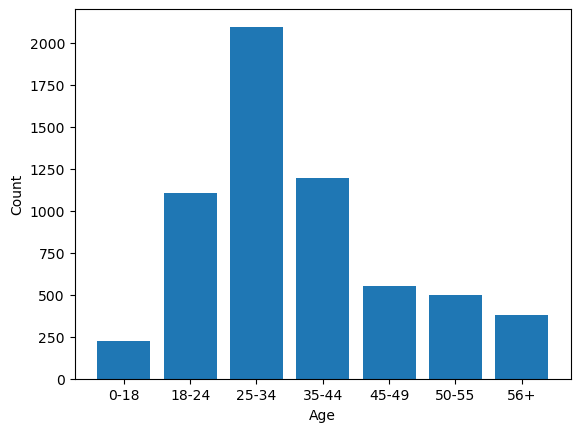

In [60]:
import matplotlib.pyplot as plt
plt.bar(age_counts_sorted.index, age_counts_sorted.values)
# plt.hist(age_counts_sorted)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [61]:
# 4 Merge users_data dan movie_ratings_data
users_data.head(5)

,userid,gender,age,occupation,zipcode
0,1,F,0-18,10,48067
1,2,M,56+,16,70072
2,3,M,25-34,15,55117
3,4,M,45-49,7,02460
4,5,M,25-34,20,55455


In [62]:
movie_ratings_data.head(5)

,movieid,title,genres,userid,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [63]:
data = pd.merge(movie_ratings_data, users_data)
data.head(5)

,movieid,title,genres,userid,rating,timestamp,gender,age,occupation,zipcode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,0-18,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,0-18,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,0-18,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,0-18,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,0-18,10,48067


In [65]:
# 5 display user age > 50
data_50 = data.loc[data['age'] == '50-55']
data_50.head(5)

,movieid,title,genres,userid,rating,timestamp,gender,age,occupation,zipcode
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50-55,9,55117
54,17,Sense and Sensibility (1995),Drama|Romance,6,4,978236383,F,50-55,9,55117
55,34,Babe (1995),Children's|Comedy|Drama,6,4,978237444,F,50-55,9,55117
56,48,Pocahontas (1995),Animation|Children's|Musical|Romance,6,5,978237570,F,50-55,9,55117
57,199,"Umbrellas of Cherbourg, The (Parapluies de Che...",Drama|Musical,6,5,978237570,F,50-55,9,55117


In [67]:
data_50.shape

(72490, 10)

In [68]:
# 6 jumlah user dan rata-rata rating tiap range umur
# question: user dengan range umur mana yg lebih kritis? tua atau muda? 
data_stats = data.groupby('age').agg({'rating':[np.size, np.mean]})
data_stats

rating          
         size      mean
age                    
0-18    27211  3.549520
18-24  183536  3.507573
25-34  395556  3.545235
35-44  199003  3.618162
45-49   83633  3.638062
50-55   72490  3.714512
56+     38780  3.766632

In [72]:
# 7 tampilkan film, range umur, rata-rata rating
by_age = data.groupby(['title','age']).agg({'rating':[np.size, np.mean]})
by_age
# by_age.rating.mean()

rating          
                               size      mean
title                  age                   
$1,000,000 Duck (1971) 18-24      6  3.000000
                       25-34     11  3.090909
                       35-44     15  3.133333
                       45-49      1  2.000000
                       50-55      4  2.750000
...                             ...       ...
eXistenZ (1999)        25-34    183  3.234973
                       35-44     74  3.364865
                       45-49     27  3.222222
                       50-55     24  3.291667
                       56+        5  2.200000

[22457 rows x 2 columns]

In [73]:
by_age = data.groupby(['title','age'])
by_age.rating.mean()

title                   age  
$1,000,000 Duck (1971)  18-24    3.000000
                        25-34    3.090909
                        35-44    3.133333
                        45-49    2.000000
                        50-55    2.750000
                                   ...   
eXistenZ (1999)         25-34    3.234973
                        35-44    3.364865
                        45-49    3.222222
                        50-55    3.291667
                        56+      2.200000
Name: rating, Length: 22457, dtype: float64

In [76]:
# 8 tampilkan dalam bentuk tabel
# kolom: range usia
# baris: judul film
by_age.rating.mean().unstack(1).fillna(0)

age,0-18,18-24,25-34,35-44,45-49,50-55,56+
title,,,,,,,
"$1,000,000 Duck (1971)",0.000000,3.000000,3.090909,3.133333,2.000000,2.750000,0.000000
'Night Mother (1986),2.000000,4.666667,3.423077,2.904762,3.833333,3.555556,4.333333
'Til There Was You (1997),3.500000,2.500000,2.666667,2.900000,2.333333,2.500000,2.666667
"'burbs, The (1989)",4.500000,3.244444,2.652174,2.818182,2.545455,3.208333,2.666667
...And Justice for All (1979),3.000000,3.428571,3.724138,3.657143,4.100000,3.551724,3.928571
...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",1.000000,3.000000,3.375000,3.777778,4.000000,3.000000,0.000000
Zero Effect (1998),4.125000,3.883333,3.715278,3.608696,3.764706,3.833333,3.625000
Zero Kelvin (Kjærlighetens kjøtere) (1995),0.000000,0.000000,0.000000,3.500000,0.000000,0.000000,0.000000


### Pivot Table

In [77]:
data_sales = {
    'Region': ['East', 'West', 'North', 'South', 'East', 'West', 'North', 'South'],
    'Product': ['A', 'A', 'B', 'B', 'A', 'A', 'B', 'B'],
    'Sales': [100, 200, 150, 250, 120, 180, 130, 220]
}
df_sales = pd.DataFrame(data_sales)
df_sales

,Region,Product,Sales
0,East,A,100
1,West,A,200
2,North,B,150
3,South,B,250
4,East,A,120
5,West,A,180
6,North,B,130
7,South,B,220


In [84]:
# buatlah tabel baru
# kolom: Product A, B
# baris(index): Region East, West, South, West
df_sales_pivot = df_sales.pivot_table(columns='Product', index='Region', aggfunc='sum').fillna(0)
df_sales_pivot

Sales       
Product      A      B
Region               
East     220.0    0.0
North      0.0  280.0
South      0.0  470.0
West     380.0    0.0